In [6]:
# Курсовая работа по предмету Библиотеки Python для Data Science: продолжение

In [7]:
#Задача:
#Требуется, на основании имеющихся данных о клиентах банка, построить модель, используя обучающий датасет, для прогнозирования невыполнения долговых обязательств по текущему кредиту. Выполнить прогноз для примеров из тестового датасета.

In [8]:
#Описание датасета

#Home Ownership - домовладение
#Annual Income - годовой доход
#Years in current job - количество лет на текущем месте работы
#Tax Liens - налоговые обременения
#Number of Open Accounts - количество открытых счетов
#Years of Credit History - количество лет кредитной истории
#Maximum Open Credit - наибольший открытый кредит
#Number of Credit Problems - количество проблем с кредитом
#Months since last delinquent - количество месяцев с последней просрочки платежа
#Bankruptcies - банкротства
#Purpose - цель кредита
#Term - срок кредита
#Current Loan Amount - текущая сумма кредита
#Current Credit Balance - текущий кредитный баланс
#Monthly Debt - ежемесячный долг
#Credit Default - факт невыполнения кредитных обязательств (0 - погашен вовремя, 1 - просрочка)

In [9]:
#Подгружаем библиотеки и для пропуска ошибок и отображения графиков без задействования всплывающих окон используем скрипты:

import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import probplot
from scipy.stats import shapiro
from scipy.stats import ttest_ind
from scipy.stats import mannwhitneyu
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, VotingClassifier
import xgboost as xgb
import lightgbm as lgbm
import catboost as catb
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV, cross_val_score, learning_curve
import pickle
from sklearn.model_selection import KFold, GridSearchCV, RandomizedSearchCV

In [10]:
#загружаем данные
DATASET_TRAIN = 'course_project_train.csv'
DATASET_TEST = 'course_project_test.csv'

In [11]:
df_train = pd.read_csv(DATASET_TRAIN, encoding='utf-8')
df_test = pd.read_csv(DATASET_TEST, encoding='utf-8')

In [12]:
#1.Обзор обучающего датасета
df_train

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score,Credit Default
0,Own Home,482087.0,NaN,0.0,11.0,26.3,685960.0,1.0,NaN,1.0,debt consolidation,Short Term,99999999.0,47386.0,7914.0,749.0,0
1,Own Home,1025487.0,10+ years,0.0,15.0,15.3,1181730.0,0.0,NaN,0.0,debt consolidation,Long Term,264968.0,394972.0,18373.0,737.0,1
2,Home Mortgage,751412.0,8 years,0.0,11.0,35.0,1182434.0,0.0,NaN,0.0,debt consolidation,Short Term,99999999.0,308389.0,13651.0,742.0,0
3,Own Home,805068.0,6 years,0.0,8.0,22.5,147400.0,1.0,NaN,1.0,debt consolidation,Short Term,121396.0,95855.0,11338.0,694.0,0
4,Rent,776264.0,8 years,0.0,13.0,13.6,385836.0,1.0,NaN,0.0,debt consolidation,Short Term,125840.0,93309.0,7180.0,719.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7495,Rent,402192.0,< 1 year,0.0,3.0,8.5,107866.0,0.0,NaN,0.0,other,Short Term,129360.0,73492.0,1900.0,697.0,0
7496,Home Mortgage,1533984.0,1 year,0.0,10.0,26.5,686312.0,0.0,43.0,0.0,debt consolidation,Long Term,444048.0,456399.0,12783.0,7410.0,1
7497,Rent,1878910.0,6 years,0.0,12.0,32.1,1778920.0,0.0,NaN,0.0,buy a car,Short Term,99999999.0,477812.0,12479.0,748.0,0
7498,Home Mortgage,NaN,NaN,0.0,21.0,26.5,1141250.0,0.0,NaN,0.0,debt consolidation,Short Term,615274.0,476064.0,37118.0,NaN,0


In [13]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float64
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float64
 4   Number of Open Accounts       7500 non-null   float64
 5   Years of Credit History       7500 non-null   float64
 6   Maximum Open Credit           7500 non-null   float64
 7   Number of Credit Problems     7500 non-null   float64
 8   Months since last delinquent  3419 non-null   float64
 9   Bankruptcies                  7486 non-null   float64
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float64
 13  Cur

In [14]:
df_test

,Home Ownership,Annual Income,Years in current job,Tax Liens,Number of Open Accounts,Years of Credit History,Maximum Open Credit,Number of Credit Problems,Months since last delinquent,Bankruptcies,Purpose,Term,Current Loan Amount,Current Credit Balance,Monthly Debt,Credit Score
0,Rent,NaN,4 years,0.0,9.0,12.5,220968.0,0.0,70.0,0.0,debt consolidation,Short Term,162470.0,105906.0,6813.0,NaN
1,Rent,231838.0,1 year,0.0,6.0,32.7,55946.0,0.0,8.0,0.0,educational expenses,Short Term,78298.0,46037.0,2318.0,699.0
2,Home Mortgage,1152540.0,3 years,0.0,10.0,13.7,204600.0,0.0,NaN,0.0,debt consolidation,Short Term,200178.0,146490.0,18729.0,7260.0
3,Home Mortgage,1220313.0,10+ years,0.0,16.0,17.0,456302.0,0.0,70.0,0.0,debt consolidation,Short Term,217382.0,213199.0,27559.0,739.0
4,Home Mortgage,2340952.0,6 years,0.0,11.0,23.6,1207272.0,0.0,NaN,0.0,debt consolidation,Long Term,777634.0,425391.0,42605.0,706.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,Home Mortgage,1020053.0,10+ years,0.0,14.0,29.1,559152.0,1.0,68.0,1.0,debt consolidation,Short Term,99999999.0,162735.0,15046.0,745.0
2496,Home Mortgage,NaN,2 years,0.0,15.0,17.0,1737780.0,0.0,77.0,0.0,debt consolidation,Short Term,468512.0,1439269.0,32996.0,NaN
2497,Home Mortgage,1171806.0,2 years,0.0,48.0,12.8,1706430.0,0.0,NaN,0.0,debt consolidation,Short Term,430496.0,676438.0,36912.0,695.0
2498,Rent,723520.0,10+ years,0.0,14.0,28.8,945780.0,0.0,NaN,0.0,debt consolidation,Short Term,257774.0,391248.0,13506.0,744.0


In [15]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float64
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float64
 4   Number of Open Accounts       2500 non-null   float64
 5   Years of Credit History       2500 non-null   float64
 6   Maximum Open Credit           2500 non-null   float64
 7   Number of Credit Problems     2500 non-null   float64
 8   Months since last delinquent  1142 non-null   float64
 9   Bankruptcies                  2497 non-null   float64
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float64
 13  Cur

In [16]:
print('Строк в трейне:', df_train.shape[0])
print('Строк в тесте', df_test.shape[0])

Строк в трейне: 7500
Строк в тесте 2500


In [17]:
#Уменьшим объём занимаемых данных 
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df_train.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df

In [18]:
df_train = reduce_mem_usage(df_train)

Memory usage of dataframe is 0.97 MB
Memory usage after optimization is: 0.58 MB
Decreased by 40.4%


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                7500 non-null   object 
 1   Annual Income                 5943 non-null   float32
 2   Years in current job          7129 non-null   object 
 3   Tax Liens                     7500 non-null   float32
 4   Number of Open Accounts       7500 non-null   float32
 5   Years of Credit History       7500 non-null   float32
 6   Maximum Open Credit           7500 non-null   float32
 7   Number of Credit Problems     7500 non-null   float32
 8   Months since last delinquent  3419 non-null   float32
 9   Bankruptcies                  7486 non-null   float32
 10  Purpose                       7500 non-null   object 
 11  Term                          7500 non-null   object 
 12  Current Loan Amount           7500 non-null   float32
 13  Cur

In [20]:
df_test = reduce_mem_usage(df_test)

Memory usage of dataframe is 0.58 MB
Memory usage after optimization is: 0.19 MB
Decreased by 67.1%


In [21]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Home Ownership                2500 non-null   object 
 1   Annual Income                 1987 non-null   float32
 2   Years in current job          2414 non-null   object 
 3   Tax Liens                     2500 non-null   float32
 4   Number of Open Accounts       2500 non-null   float32
 5   Years of Credit History       2500 non-null   float32
 6   Maximum Open Credit           2500 non-null   float32
 7   Number of Credit Problems     2500 non-null   float32
 8   Months since last delinquent  1142 non-null   float32
 9   Bankruptcies                  2497 non-null   float32
 10  Purpose                       2500 non-null   object 
 11  Term                          2500 non-null   object 
 12  Current Loan Amount           2500 non-null   float32
 13  Cur

In [22]:
df_train.columns

Index(['Home Ownership', 'Annual Income', 'Years in current job', 'Tax Liens',
       'Number of Open Accounts', 'Years of Credit History',
       'Maximum Open Credit', 'Number of Credit Problems',
       'Months since last delinquent', 'Bankruptcies', 'Purpose', 'Term',
       'Current Loan Amount', 'Current Credit Balance', 'Monthly Debt',
       'Credit Score', 'Credit Default'],
      dtype='object')

In [23]:
#Список категориальных переменных
cat_var = [col for col in df_train.columns if df_train[col].dtype == 'object']

In [24]:
#Список вещественных переменных переменных
float_var = [col for col in df_train.columns if df_train[col].dtype == 'float64' or df_train[col].dtype == 'float32']

In [25]:
cat_var 

['Home Ownership', 'Years in current job', 'Purpose', 'Term']

In [26]:
float_var

['Annual Income',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt',
 'Credit Score']

In [27]:
#2.Обработка выбросов и 3.Обработка пропусков
# Начтнаем просматривать поля датасета на предмет выбросов и пропусков
df_train['Home Ownership'].value_counts()

Home Mortgage    3637
Rent             3204
Own Home          647
Have Mortgage      12
Name: Home Ownership, dtype: int64

In [28]:
df_train['Annual Income'].value_counts()
df_train['Annual Income'].isna().sum()

1557

In [29]:
df_train['Annual Income'].describe()

count    5.943000e+03
mean     1.366392e+06
std      8.453392e+05
min      1.645970e+05
25%      8.443410e+05
50%      1.168386e+06
75%      1.640137e+06
max      1.014934e+07
Name: Annual Income, dtype: float64

In [30]:
!#в данном поле имеем 1557 пропусков, чтобы увеличить точность прогнозирования нашей модели мы должны заполнить их, 
#например средним значением:
df_train['Annual Income'] = df_train['Annual Income'].fillna((df_train['Annual Income'].median()))

"#ў" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [31]:
df_train['Annual Income'].isna().sum()

0

In [32]:
df_train['Years in current job'].value_counts()

10+ years    2332
2 years       705
3 years       620
< 1 year      563
5 years       516
1 year        504
4 years       469
6 years       426
7 years       396
8 years       339
9 years       259
Name: Years in current job, dtype: int64

In [33]:
# Переводим строковые значения в числовые. а значение 10+ years в число 10 (так как это не повлияет на нашу модель)
df_train.loc[df_train['Years in current job'] == '10+ years', 'Years in current job'] = 10
df_train.loc[df_train['Years in current job'] == '8 years', 'Years in current job'] = 8
df_train.loc[df_train['Years in current job'] == '6 years', 'Years in current job'] = 6
df_train.loc[df_train['Years in current job'] == '1 year', 'Years in current job'] = 1
df_train.loc[df_train['Years in current job'] == '4 years', 'Years in current job'] = 4
df_train.loc[df_train['Years in current job'] == '7 years', 'Years in current job'] = 7
df_train.loc[df_train['Years in current job'] == '3 years', 'Years in current job'] = 3
df_train.loc[df_train['Years in current job'] == '2 years', 'Years in current job'] = 2
df_train.loc[df_train['Years in current job'] == '5 years', 'Years in current job'] = 5
df_train.loc[df_train['Years in current job'] == '7 years', 'Years in current job'] = 7
df_train.loc[df_train['Years in current job'] == '9 years', 'Years in current job'] = 9
df_train.loc[df_train['Years in current job'] == '< 1 year', 'Years in current job'] = 0.5

In [34]:
df_train['Years in current job'].value_counts()

10.0    2332
2.0      705
3.0      620
0.5      563
5.0      516
1.0      504
4.0      469
6.0      426
7.0      396
8.0      339
9.0      259
Name: Years in current job, dtype: int64

In [35]:
df_train['Years in current job'] = df_train['Years in current job'].fillna((df_train['Years in current job'].mean()))

In [36]:
#Компания может открывать любое количество счетов, как в одном банке, так и в разных кредитных учреждениях. Общее количество как самих счетов, так и обслуживающих банков не ограничено законом.
df_train['Number of Open Accounts'].value_counts()

9.0     728
11.0    692
10.0    677
8.0     638
7.0     613
12.0    562
6.0     504
13.0    465
14.0    420
5.0     325
15.0    313
16.0    265
17.0    232
4.0     212
18.0    143
19.0    139
3.0      95
20.0     93
21.0     78
23.0     59
24.0     50
22.0     49
25.0     32
2.0      28
28.0     14
27.0     14
26.0     12
30.0     11
29.0     10
32.0      6
33.0      6
31.0      6
34.0      2
37.0      2
43.0      1
41.0      1
38.0      1
35.0      1
42.0      1
Name: Number of Open Accounts, dtype: int64

In [37]:
df_train['Years of Credit History'].value_counts()

15.000000    104
16.000000     99
16.500000     91
17.000000     86
17.500000     83
            ... 
44.000000      1
39.799999      1
40.000000      1
39.900002      1
48.299999      1
Name: Years of Credit History, Length: 408, dtype: int64

In [38]:
df_train['Maximum Open Credit'].value_counts()

0.0         65
319110.0     5
246224.0     3
344058.0     3
513524.0     3
            ..
668360.0     1
642224.0     1
779372.0     1
372812.0     1
480832.0     1
Name: Maximum Open Credit, Length: 6963, dtype: int64

In [39]:
df_train['Number of Credit Problems'].value_counts()

0.0    6469
1.0     882
2.0      93
3.0      35
4.0       9
5.0       7
6.0       4
7.0       1
Name: Number of Credit Problems, dtype: int64

In [40]:
df_train['Months since last delinquent'] = df_train['Months since last delinquent'].fillna((df_train['Months since last delinquent'].median()))

In [41]:
df_train['Months since last delinquent'].value_counts()

32.0     4132
14.0       76
29.0       71
33.0       68
8.0        68
         ... 
86.0        1
118.0       1
84.0        1
91.0        1
92.0        1
Name: Months since last delinquent, Length: 89, dtype: int64

In [42]:
df_train['Bankruptcies'] = df_train['Bankruptcies'].fillna(df_train['Bankruptcies'].median())

In [43]:
df_train['Purpose'].value_counts()

debt consolidation      5944
other                    665
home improvements        412
business loan            129
buy a car                 96
medical bills             71
major purchase            40
take a trip               37
buy house                 34
small business            26
wedding                   15
moving                    11
educational expenses      10
vacation                   8
renewable energy           2
Name: Purpose, dtype: int64

In [44]:
df_train['Term'].value_counts()

Short Term    5556
Long Term     1944
Name: Term, dtype: int64

In [45]:
df_train['Current Loan Amount'].value_counts()

100000000.0    870
218064.0         6
89298.0          6
222926.0         5
265826.0         5
              ... 
351626.0         1
212498.0         1
187682.0         1
108922.0         1
26928.0          1
Name: Current Loan Amount, Length: 5386, dtype: int64

In [46]:
df_train['Current Credit Balance'].value_counts()

0.0         53
191710.0     5
106818.0     4
83638.0      4
136401.0     4
            ..
445360.0     1
243371.0     1
25688.0      1
62054.0      1
288192.0     1
Name: Current Credit Balance, Length: 6592, dtype: int64

In [47]:
df_train['Monthly Debt'].value_counts()

0.0        6
19222.0    4
19667.0    4
12986.0    3
13356.0    3
          ..
33217.0    1
8203.0     1
15150.0    1
1992.0     1
9061.0     1
Name: Monthly Debt, Length: 6716, dtype: int64

In [48]:
df_train['Credit Score'] = df_train['Credit Score'].fillna((df_train['Credit Score'].median()))

In [49]:
df_train.isna().sum()

Home Ownership                  0
Annual Income                   0
Years in current job            0
Tax Liens                       0
Number of Open Accounts         0
Years of Credit History         0
Maximum Open Credit             0
Number of Credit Problems       0
Months since last delinquent    0
Bankruptcies                    0
Purpose                         0
Term                            0
Current Loan Amount             0
Current Credit Balance          0
Monthly Debt                    0
Credit Score                    0
Credit Default                  0
dtype: int64

In [50]:
#Создаём класс DataPreprocessing для оптимизации процесса обработки пропусков:
class DataPreprocessing:
    """Подготовка исходных данных"""

    def __init__(self):
        """Параметры класса"""
        self.means = None
        
    def fit(self, X):
        """Сохранение статистик"""       
        # Расчет среднего
        self.means = X.mean()
    
    def transform(self, X):
        """Трансформация данных"""

        # Annual Income
        X['Annual Income'] = X['Annual Income'].fillna((X['Annual Income'].mean()))
        
        # Years in current job
        X.loc[X['Years in current job'] == '10+ years', 'Years in current job'] = 10
        X.loc[X['Years in current job'] == '8 years', 'Years in current job'] = 8
        X.loc[X['Years in current job'] == '6 years', 'Years in current job'] = 6
        X.loc[X['Years in current job'] == '1 year', 'Years in current job'] = 1
        X.loc[X['Years in current job'] == '4 years', 'Years in current job'] = 4
        X.loc[X['Years in current job'] == '7 years', 'Years in current job'] = 7
        X.loc[X['Years in current job'] == '3 years', 'Years in current job'] = 3
        X.loc[X['Years in current job'] == '2 years', 'Years in current job'] = 2
        X.loc[X['Years in current job'] == '5 years', 'Years in current job'] = 5
        X.loc[X['Years in current job'] == '7 years', 'Years in current job'] = 7
        X.loc[X['Years in current job'] == '9 years', 'Years in current job'] = 9
        X.loc[X['Years in current job'] == '< 1 year', 'Years in current job'] = 0.5
        X['Years in current job'] = X['Years in current job'].fillna((X['Years in current job'].mean()))
        
        # Months since last delinquent
        X['Months since last delinquent'] = X['Months since last delinquent'].fillna((X['Months since last delinquent'].mean()))
        
        # Bankruptcies   
        X['Bankruptcies'] = X['Bankruptcies'].fillna(X['Bankruptcies'].mean())
        
        # LifeSquare !!!!!!!!!!!
        X['Credit Score'] = X['Credit Score'].fillna((X['Credit Score'].mean()))
        
        
        return X

In [51]:
def get_classification_report(y_train_true, y_train_pred, y_test_true, y_test_pred):
    print('TRAIN\n\n' + classification_report(y_train_true, y_train_pred))
    print('TEST\n\n' + classification_report(y_test_true, y_test_pred))
    print('CONFUSION MATRIX\n')
    print(pd.crosstab(y_test_true, y_test_pred))

In [52]:
def balance_df_by_target(df, target_name):

    target_counts = df[target_name].value_counts()

    major_class_name = target_counts.argmax()
    minor_class_name = target_counts.argmin()

    disbalance_coeff = int(target_counts[major_class_name] / target_counts[minor_class_name]) - 1

    for i in range(disbalance_coeff):
        sample = df[df[target_name] == minor_class_name].sample(target_counts[minor_class_name])
        df = df.append(sample, ignore_index=True)

    return df.sample(frac=1) 

In [53]:
#График оценки статистической частоты.
def estimate_frequency_plot(data, variables, font_scale, figsize, style):
    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)
    plt.style.use(style)

    for i, feature in enumerate(variables):
        counts = data[feature].value_counts()

        plt.subplot(3,2,i+1)    
        plt.title(feature)
        sns.barplot(counts.index, counts.values)

In [54]:
#График оценки доли переменной в разрезе целевой переменной.
def estimate_share_plot(data, variables, font_scale, figsize, style, hue):
    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)
    plt.style.use(style)

    for i, feature in enumerate(variables):

        plt.subplot(3,2,i+1)
        plt.title(feature)
        sns.countplot(x=feature, hue=hue, data=data)

In [55]:
#4.Анализ данных
#4.1 Анализ категориальных признаков
object = [col for col in df_train.columns if df_train[col].dtype == 'object']

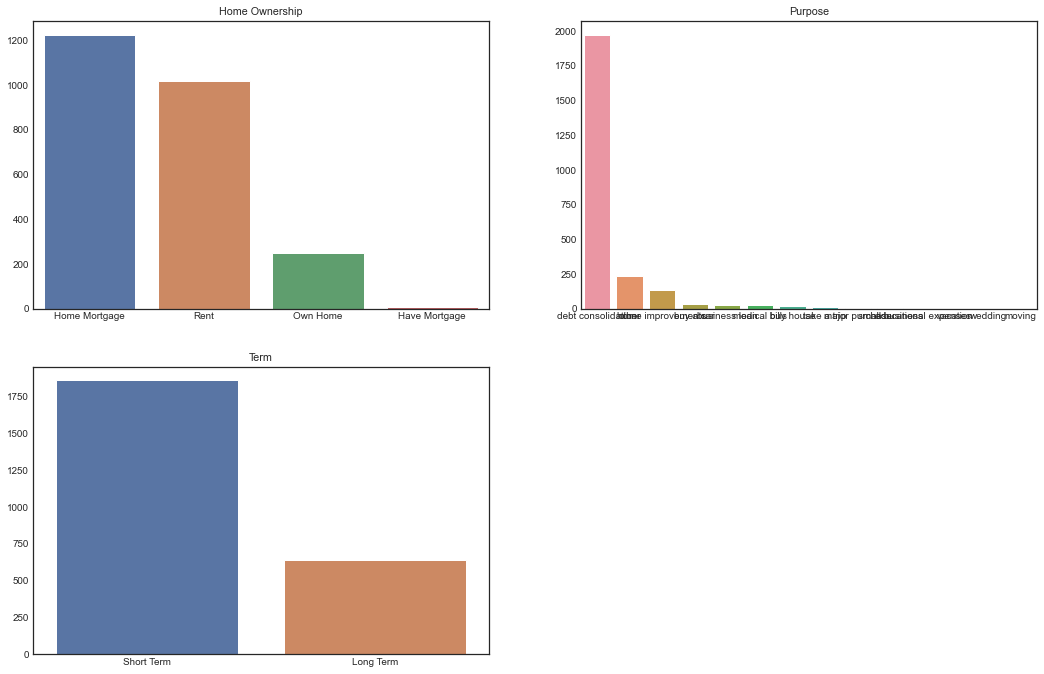

In [56]:
estimate_frequency_plot(df_test, object, 0.9, (18,18), 'seaborn-white')

In [57]:
object

['Home Ownership', 'Purpose', 'Term']

In [58]:
#Расчет хи-квадрат Пирсона
def calc_chi2(data, target, values, feature, category1, category2, aggfunc, treshold):
    table = data.loc[data[feature].isin([category1, category2]),[values, feature, target]]
    table[values] = table.index
    chi2_table = table.pivot_table(values = values,
                                   index=feature, 
                                   columns=target, 
                                   aggfunc=aggfunc)
    chi2, p, dof, expected = chi2_contingency(chi2_table, correction=False)
    
    if p < treshold:
        print(f'Разделение на категории {category1} и {category2} для {feature} статистически значимо')
    else:
        print(f'Разделение на категории {category1} и {category2} для {feature} статистически незначимо')

Чтобы понять оптимальное количество групп, на которые стоит разбивать эти признаки будем использовать критерий хи-квадрат Пирсона на уровне значимости 0.05.

Метод позволяет оценить статистическую значимость различий двух или нескольких относительных показателей (частот, долей).

$x^n = (x_1, .. , x_n), \: x^n \in X$

$H_0:$ Эмпирические (наблюдаемые) и теоретические (ожидаемые) частоты согласованы
$H_1: \: H_0 \:$ неверна

$$\chi^2 = \sum_{i=1}^K \frac{(O_i - E_i)^2}{E_i}$$
$O$ (Observed) - наблюдаемые частоты
$E$ (Expected) - ожидаемые частоты
$K$ - количество оцениваемых частот

$\chi^2 \sim \chi^2(\mathit{df})$

Сопоставляемые группы должны быть независимыми, то есть критерий хи-квадрат не должен применяться при сравнении наблюдений "до-после" или связанных пар. Аналог для зависимых выборок - тест Мак-Немара или Q-критерий Кохрена для сравнения трех и более групп.

Если в ячейке меньше 10 наблюдений, применяется поправка Йетса.

Если меньше 5, то вместо хи-квадрат используется точный тест Фишера.

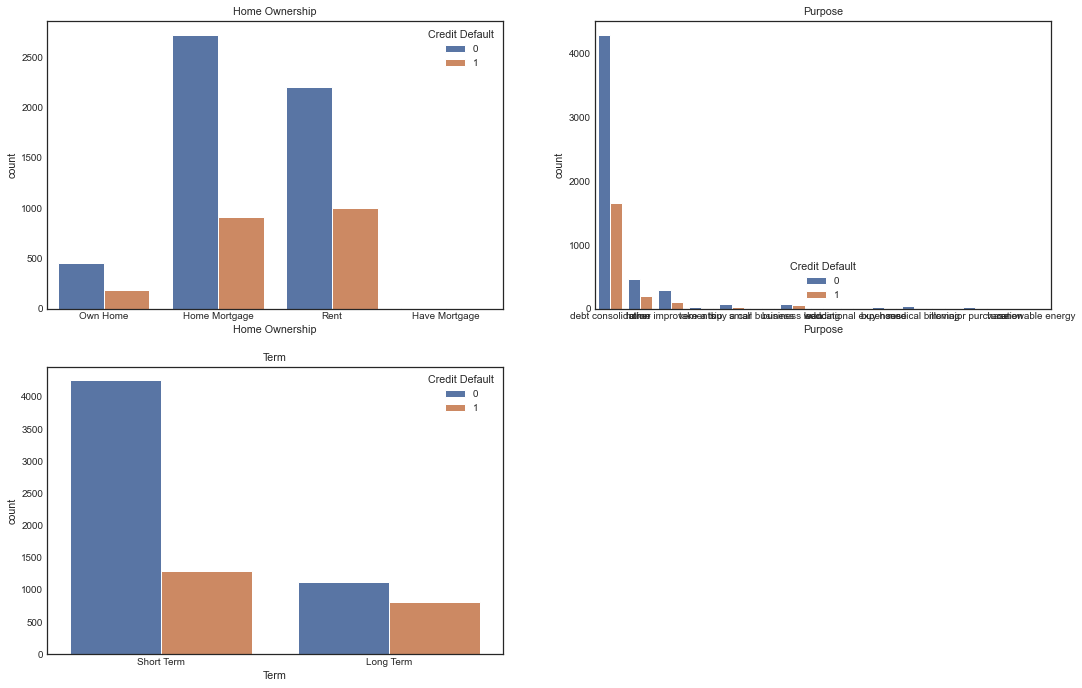

In [59]:
estimate_share_plot(df_train, object, 0.9, (18,18), 'seaborn-white', 'Credit Default')



Для переменной Home Ownership доля целевого признака во всех категориях примерно одинакова. Такая же картина наблюдается для переменной Years in current job, а также для переменной Purpose. Для переменной Term доля целевой переменной в категориях не одинакова. 

4.2 Анализ непрерывных признаков
Построим доверительные интервалы для средних значений каждой из двух групп и сравним их.

Доверительный интервал - это вид интервальной оценки, которая задаёт числовые границы, в которых с определённой вероятностью находится истинное значение оцениваемого параметра.

Порядок расчета доверительного интервала (для мат. ожидания)

Задать уровень достоверности (confidence level), $\alpha = 95\% = 0.95$
Найти по таблице Z-оценок или рассчитать коэффициент достоверности (confidence coefficient) - $ Z_{\alpha/2}$, для $\alpha = 0.95, Z_{\alpha/2} = 1.96$
Рассчитать доверительный интервал (confidence interval):
$$ CI = \overline{x} \pm Z_{\alpha/2} \frac{\sigma}{\sqrt{n}}$$

где $ \bar{x}$ - выборочное среднее, $ \sigma$ - стандартное отклонение, $ n$ - размер выборки

In [60]:
float = [col for col in df_train.columns if df_train[col].dtype == 'float64' or 'float32']

In [61]:
#Кроссвалидация.
cv = StratifiedKFold(n_splits=3, random_state=43, shuffle=True)

In [62]:
# График доверительного интервала с расчётом
def confidence_interval_plot(data, variables, font_scale, figsize, style, capsize, target):
    sns.set(font_scale=font_scale)
    plt.figure(figsize=figsize)
    plt.style.use(style)
    
    for i, feature in enumerate(variables):
       
        plt.subplot(4,3,i+1)  
        sns.pointplot(x=target, y=feature, data=data, capsize=capsize)
        plt.title('95 процентный доверительный интервал для' + ' ' + feature);

ValueError: num must be 1 <= num <= 12, not 13

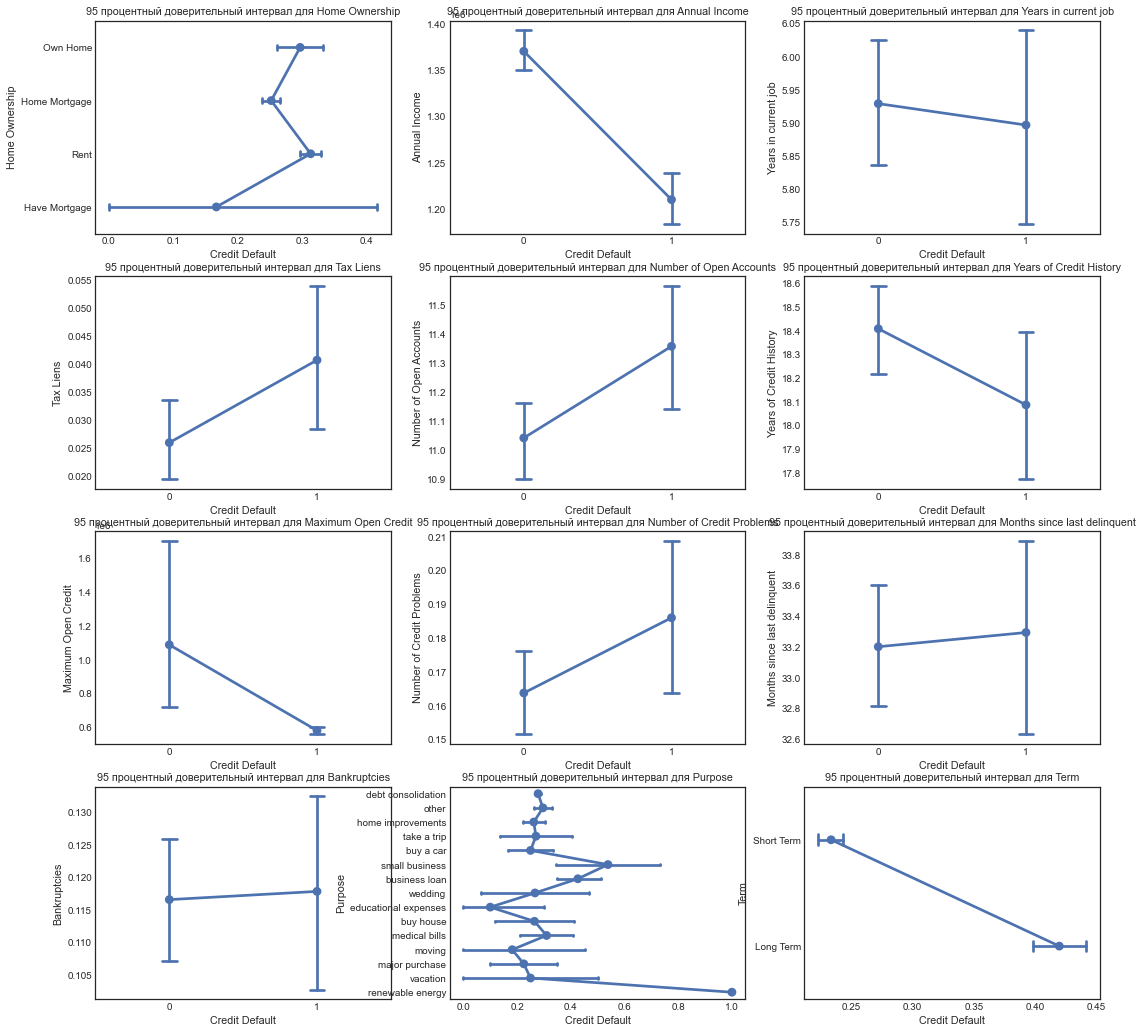

In [63]:
confidence_interval_plot(data=df_train, variables=float, 
                         font_scale=0.9, figsize=(18,18), 
                         style='seaborn-white', capsize=.1,
                         target='Credit Default');

На 95 процентном доврительном интервале средние значения для переменных Months since last delinquent и Bankruptcies практически одинаково, так же Number of Credit Problems,Tax Liens и Number of Open Accounts. Для остальных непрерывных признаков выборочные средние различаются. Это может говорить о том, что эти две переменные и три другие не оказывают функциональной зависимости на целевую переменную.

Анализ целевой переменной

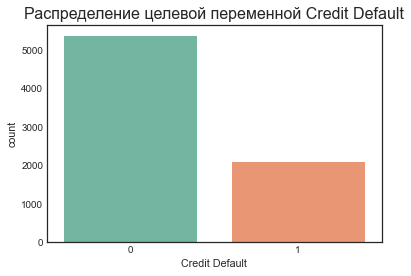

In [64]:
sns.countplot(x='Credit Default', data = df_train, palette="Set2")
plt.title('Распределение целевой переменной Credit Default', fontsize=16);

In [65]:
df_train['Credit Default'].value_counts(normalize=True)

0    0.718267
1    0.281733
Name: Credit Default, dtype: float64

Классы не сбалансированы. Балансировка классов может сыграть полезную роль в построении модели.

Анализ признакового пространства.
Матрица корреляций

In [66]:
def cor_plot(data, method):
    plt.figure(figsize = (14,14))

    sns.set(font_scale=1)
    sns.heatmap(data.corr(method).round(2), annot=True, linewidths=.5, cmap='coolwarm')
    plt.title('Матрица корреляций');

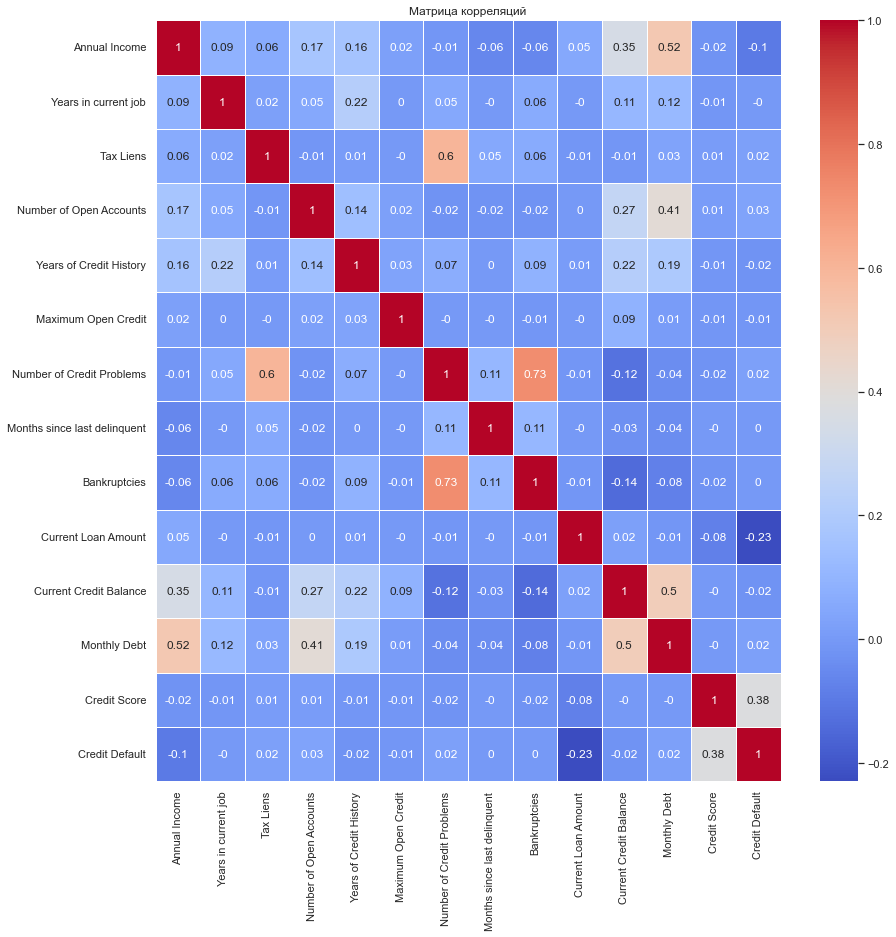

In [67]:
cor_plot(data=df_train, method='pearson');

5. Подбор моделей, получение бейзлана 

In [68]:
TARGET_NAME = 'Credit Default'
df_train = pd.read_csv(DATASET_TRAIN, encoding='utf-8')
df_test = pd.read_csv(DATASET_TEST, encoding='utf-8')

In [69]:
df_train.loc[df_train['Home Ownership'] == 'Home Mortgage', 'Home Ownership'] = 1
df_train.loc[df_train['Home Ownership'] == 'Rent', 'Home Ownership'] = 2
df_train.loc[df_train['Home Ownership'] == 'Own Home', 'Home Ownership'] = 3
df_train.loc[df_train['Home Ownership'] == 'Have Mortgage', 'Home Ownership'] = 4
df_train.loc[df_train['Years in current job'] == '10+ years', 'Years in current job'] = 10
df_train.loc[df_train['Years in current job'] == '8 years', 'Years in current job'] = 8
df_train.loc[df_train['Years in current job'] == '6 years', 'Years in current job'] = 6
df_train.loc[df_train['Years in current job'] == '1 year', 'Years in current job'] = 1
df_train.loc[df_train['Years in current job'] == '4 years', 'Years in current job'] = 4
df_train.loc[df_train['Years in current job'] == '7 years', 'Years in current job'] = 7
df_train.loc[df_train['Years in current job'] == '3 years', 'Years in current job'] = 3
df_train.loc[df_train['Years in current job'] == '2 years', 'Years in current job'] = 2
df_train.loc[df_train['Years in current job'] == '5 years', 'Years in current job'] = 5
df_train.loc[df_train['Years in current job'] == '7 years', 'Years in current job'] = 7
df_train.loc[df_train['Years in current job'] == '9 years', 'Years in current job'] = 9
df_train.loc[df_train['Years in current job'] == '< 1 year', 'Years in current job'] = 0.5
df_train.loc[df_train['Purpose'] == 'debt consolidation', 'Purpose'] = 1
df_train.loc[df_train['Purpose'] == 'other', 'Purpose'] = 2
df_train.loc[df_train['Purpose'] == 'home improvements', 'Purpose'] = 3
df_train.loc[df_train['Purpose'] == 'business loan', 'Purpose'] = 4
df_train.loc[df_train['Purpose'] == 'buy a car', 'Purpose'] = 5
df_train.loc[df_train['Purpose'] == 'medical bills', 'Purpose'] = 6
df_train.loc[df_train['Purpose'] == 'major purchase', 'Purpose'] = 7
df_train.loc[df_train['Purpose'] == 'take a trip', 'Purpose'] = 8
df_train.loc[df_train['Purpose'] == 'buy house', 'Purpose'] = 9
df_train.loc[df_train['Purpose'] == 'small business', 'Purpose'] = 10
df_train.loc[df_train['Purpose'] == 'wedding', 'Purpose'] = 11
df_train.loc[df_train['Purpose'] == 'moving', 'Purpose'] = 12
df_train.loc[df_train['Purpose'] == 'educational expenses', 'Purpose'] = 13
df_train.loc[df_train['Purpose'] == 'vacation', 'Purpose'] = 14
df_train.loc[df_train['Purpose'] == 'renewable energy', 'Purpose'] = 15
df_train.loc[df_train['Purpose'] == 'debt consolidation', 'Purpose'] = 1
df_train.loc[df_train['Term'] == 'Short Term', 'Term'] = 1
df_train.loc[df_train['Term'] == 'Long Term', 'Term'] = 2


In [70]:
df_train['Annual Income'] = df_train['Annual Income'].fillna((df_train['Annual Income'].median()))
df_train['Bankruptcies'] = df_train['Bankruptcies'].fillna(df_train['Bankruptcies'].median())
df_train['Credit Score'] = df_train['Credit Score'].fillna((df_train['Credit Score'].median()))
df_train['Months since last delinquent'] = df_train['Months since last delinquent'].fillna((df_train['Months since last delinquent'].median()))

In [71]:
df_train['Term'].value_counts()

1    5556
2    1944
Name: Term, dtype: int64

In [73]:
X = df_train.drop(columns=TARGET_NAME)
y = df_train[TARGET_NAME]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=0.25, random_state=43)

Балансировка целевой переменной

In [75]:
df_for_balancing = pd.concat([X_train, y_train], axis=1)
df_balanced = balance_df_by_target(df_for_balancing, TARGET_NAME)
    
df_balanced[TARGET_NAME].value_counts()

0    4075
1    3100
Name: Credit Default, dtype: int64

Построение и оценка базовых моделей

In [76]:
#Логистическая регрессия
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

y_train_pred = model_lr.predict(X_train)
y_test_pred = model_lr.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [77]:
#k ближайших соседей
model_knn = KNeighborsClassifier()
model_knn.fit(X_train, y_train)

y_train_pred = model_knn.predict(X_train)
y_test_pred = model_knn.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [78]:
#Бустинговые алгоритмы
#XGBoost
model_xgb = xgb.XGBClassifier(random_state=21)
model_xgb.fit(X_train, y_train)

y_train_pred = model_xgb.predict(X_train)
y_test_pred = model_xgb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

ValueError: DataFrame.dtypes for data must be int, float, bool or categorical.  When
                categorical type is supplied, DMatrix parameter
                `enable_categorical` must be set to `True`.Home Ownership, Years in current job, Purpose, Term

In [79]:
#LightGBM
model_lgbm = lgbm.LGBMClassifier(random_state=21)
model_lgbm.fit(X_train, y_train)

y_train_pred = model_lgbm.predict(X_train)
y_test_pred = model_lgbm.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

ValueError: DataFrame.dtypes for data must be int, float or bool.
Did not expect the data types in the following fields: Home Ownership, Years in current job, Purpose, Term

In [108]:
#CatBoost
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)
model_catb.fit(X_train, y_train)

y_train_pred = model_catb.predict(X_train)
y_test_pred = model_catb.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4075
           1       0.98      0.56      0.72      1550

    accuracy                           0.88      5625
   macro avg       0.92      0.78      0.82      5625
weighted avg       0.89      0.88      0.86      5625

TEST

              precision    recall  f1-score   support

           0       0.77      0.96      0.85      1312
           1       0.78      0.32      0.45       563

    accuracy                           0.77      1875
   macro avg       0.77      0.64      0.65      1875
weighted avg       0.77      0.77      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1261   51
1                384  179


6. Выбор лучшей модели и подбор гиперпараметров

In [81]:
model_catb = catb.CatBoostClassifier(silent=True, random_state=21)

In [82]:
params = {'n_estimators':[50, 100, 200, 500], 
          'max_depth':[3, 5, 7, 10],
          'learning_rate':[0.001, 0.01, 0.05, 0.1]}

In [83]:
cv=KFold(n_splits=3, random_state=21, shuffle=True)

In [109]:
%%time

rs = RandomizedSearchCV(model_catb, params, scoring='f1', cv=cv, n_jobs=-1)
rs.fit(X_train, y_train)

Wall time: 40.6 s


RandomizedSearchCV(cv=KFold(n_splits=3, random_state=21, shuffle=True),
                   estimator=<catboost.core.CatBoostClassifier object at 0x000002292F344E80>,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.001, 0.01, 0.05,
                                                          0.1],
                                        'max_depth': [3, 5, 7, 10],
                                        'n_estimators': [50, 100, 200, 500]},
                   scoring='f1')

In [110]:
rs.best_params_

{'n_estimators': 200, 'max_depth': 10, 'learning_rate': 0.05}

In [111]:
rs.best_score_

0.4357650789104002

7. Обучение и оценка финальной модели

In [128]:
%%time

final_model = catb.CatBoostClassifier(silent=True, random_state=10)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4075
           1       0.98      0.56      0.72      1550

    accuracy                           0.88      5625
   macro avg       0.92      0.78      0.82      5625
weighted avg       0.89      0.88      0.86      5625

TEST

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1312
           1       0.76      0.31      0.44       563

    accuracy                           0.76      1875
   macro avg       0.76      0.64      0.65      1875
weighted avg       0.76      0.76      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1255   57
1                386  177
Wall time: 3.09 s


In [116]:
final_model = catb.CatBoostClassifier(n_estimators=500, max_depth=3,
                                      l2_leaf_reg=10,
                                      silent=True, random_state=21)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)
y_test_pred_probs = final_model.predict_proba(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.79      0.99      0.88      4075
           1       0.92      0.30      0.45      1550

    accuracy                           0.80      5625
   macro avg       0.85      0.64      0.66      5625
weighted avg       0.82      0.80      0.76      5625

TEST

              precision    recall  f1-score   support

           0       0.75      0.98      0.85      1312
           1       0.84      0.26      0.40       563

    accuracy                           0.76      1875
   macro avg       0.80      0.62      0.62      1875
weighted avg       0.78      0.76      0.72      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1285   27
1                417  146


Снижение степени переобучения

Подбор оптимального размера выборки, кривая обучения

In [117]:
final_model = catb.CatBoostClassifier(n_estimators=500, max_depth=3,
                                      class_weights=[1, 3.5],
                                      silent=True, random_state=21)

In [118]:
def show_learning_curve_plot(estimator, X, y, cv=3, n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, 
                                                            cv=cv, 
                                                            scoring='f1',
                                                            train_sizes=train_sizes, 
                                                            n_jobs=n_jobs)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,8))
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.title(f"Learning curves ({type(estimator).__name__})")
    plt.xlabel("Training examples")
    plt.ylabel("Score")     
    plt.legend(loc="best")
    plt.grid()
    plt.show()

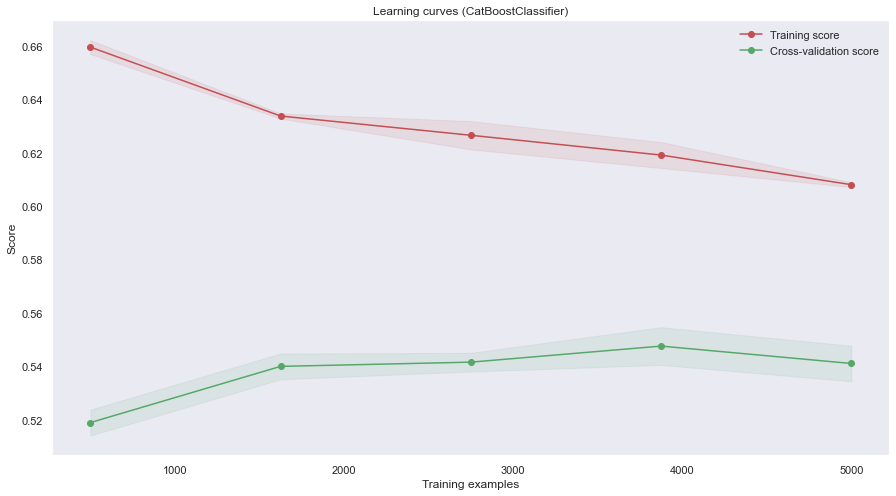

In [119]:
show_learning_curve_plot(final_model, X, y)

Выбор порога вероятности для определения класса

In [120]:
def show_proba_calibration_plots(y_predicted_probs, y_true_labels):
    preds_with_true_labels = np.array(list(zip(y_predicted_probs, y_true_labels)))

    thresholds = []
    precisions = []
    recalls = []
    f1_scores = []

    for threshold in np.linspace(0.1, 0.9, 9):
        thresholds.append(threshold)
        precisions.append(precision_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        recalls.append(recall_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))
        f1_scores.append(f1_score(y_true_labels, list(map(int, y_predicted_probs > threshold))))

    scores_table = pd.DataFrame({'f1':f1_scores,
                                 'precision':precisions,
                                 'recall':recalls,
                                 'probability':thresholds}).sort_values('f1', ascending=False).round(3)
  
    figure = plt.figure(figsize = (15, 5))

    plt1 = figure.add_subplot(121)
    plt1.plot(thresholds, precisions, label='Precision', linewidth=4)
    plt1.plot(thresholds, recalls, label='Recall', linewidth=4)
    plt1.plot(thresholds, f1_scores, label='F1', linewidth=4)
    plt1.set_ylabel('Scores')
    plt1.set_xlabel('Probability threshold')
    plt1.set_title('Probabilities threshold calibration')
    plt1.legend(bbox_to_anchor=(0.25, 0.25))   
    plt1.table(cellText = scores_table.values,
               colLabels = scores_table.columns, 
               colLoc = 'center', cellLoc = 'center', loc = 'bottom', bbox = [0, -1.3, 1, 1])

    plt2 = figure.add_subplot(122)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 0][:, 0], 
              label='Another class', color='royalblue', alpha=1)
    plt2.hist(preds_with_true_labels[preds_with_true_labels[:, 1] == 1][:, 0], 
              label='Main class', color='darkcyan', alpha=0.8)
    plt2.set_ylabel('Number of examples')
    plt2.set_xlabel('Probabilities')
    plt2.set_title('Probability histogram')
    plt2.legend(bbox_to_anchor=(1, 1))

    plt.show()

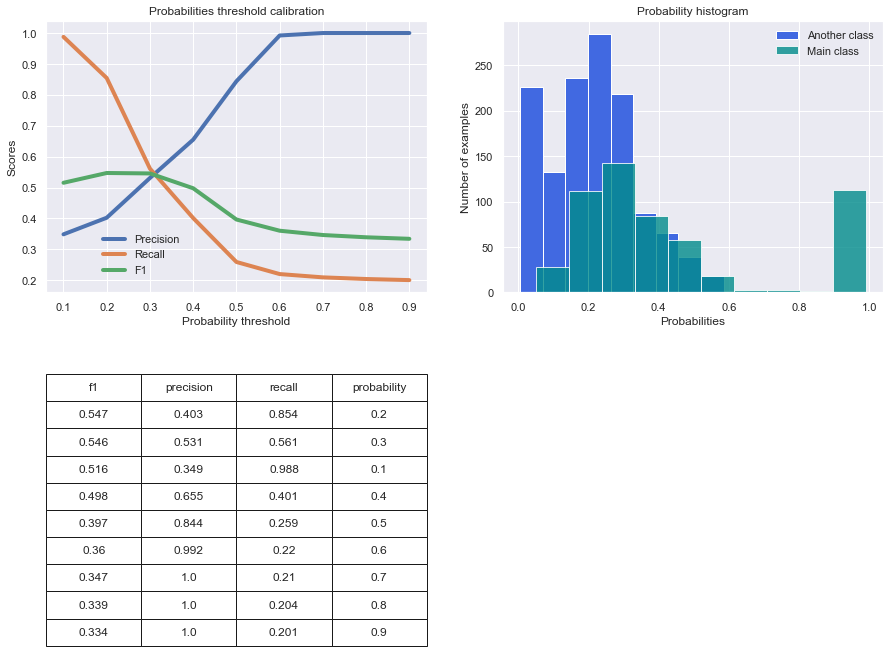

In [121]:
show_proba_calibration_plots(y_test_pred_probs[:, 1], y_test)

Важность признаков

In [122]:
def show_feature_importances(feature_names, feature_importances, get_top=None):
    feature_importances = pd.DataFrame({'feature': feature_names, 'importance': feature_importances})
    feature_importances = feature_importances.sort_values('importance', ascending=False)
       
    plt.figure(figsize = (20, len(feature_importances) * 0.355))
    
    sns.barplot(feature_importances['importance'], feature_importances['feature'])
    
    plt.xlabel('Importance')
    plt.title('Importance of features')
    plt.show()
    
    if get_top is not None:
        return feature_importances['feature'][:get_top].tolist()

In [124]:
important_features_top

['Home Ownership',
 'Annual Income',
 'Years in current job',
 'Tax Liens',
 'Number of Open Accounts',
 'Years of Credit History',
 'Maximum Open Credit',
 'Number of Credit Problems',
 'Months since last delinquent',
 'Bankruptcies',
 'Purpose',
 'Term',
 'Current Loan Amount',
 'Current Credit Balance',
 'Monthly Debt']

In [129]:
%%time

final_model = catb.CatBoostClassifier(silent=True, random_state=10)
final_model.fit(X_train, y_train)

y_train_pred = final_model.predict(X_train)
y_test_pred = final_model.predict(X_test)

get_classification_report(y_train, y_train_pred, y_test, y_test_pred)

TRAIN

              precision    recall  f1-score   support

           0       0.86      1.00      0.92      4075
           1       0.98      0.56      0.72      1550

    accuracy                           0.88      5625
   macro avg       0.92      0.78      0.82      5625
weighted avg       0.89      0.88      0.86      5625

TEST

              precision    recall  f1-score   support

           0       0.76      0.96      0.85      1312
           1       0.76      0.31      0.44       563

    accuracy                           0.76      1875
   macro avg       0.76      0.64      0.65      1875
weighted avg       0.76      0.76      0.73      1875

CONFUSION MATRIX

col_0              0    1
Credit Default           
0               1255   57
1                386  177
Wall time: 2.95 s


In [130]:
#В результате подбора методов, выбор пал на  метод машинного обучения, основанный на градиентном бустинге (Библиотека CatBoost )